In [1]:
import simplejson

def json_load(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        return simplejson.load(f)

In [2]:
from gensim.models.doc2vec import TaggedDocument

def gen_tagged_docs(corpus):
    return [TaggedDocument(doc["words"], doc["tags"]) for doc in corpus]

In [18]:
def display_similar_article_and_categories(corpus, doc_id=0, topn=10, by_article_tokens=True, by_article_tag=False):
    doc = corpus[doc_id].words
    print(' '.join(doc)[:200])

    if by_article_tokens:
        # Using words
        print("************")    
        print("Get simlarity based on tokens:")
        print()    
        inferred_vector = model.infer_vector(doc)
        sims = model.dv.most_similar([inferred_vector], topn=topn)
        for idx, factor in sims:
            print(factor, id_tag_mapping[idx])  

    if by_article_tag:
        # Using doc vector
        print("************")    
        print("Get simlarity based on article tag:")
        print()    
        inferred_vector = model.dv[corpus[doc_id].tags[0]]
        sims = model.dv.most_similar([inferred_vector], topn=topn)
        for idx, factor in sims:
            print(factor, id_tag_mapping[idx])
    
    print("************")
    print("Actual known tags:")
    print()
    print([id_tag_mapping.get(tag) for tag in corpus[doc_id].tags if tag])

In [4]:
import random
import collections
import matplotlib.pyplot as plt


def rank_by_inferredvector(corpus, sent_ids):
    ranks = []
    for sent_id in sent_ids:
        inferred_vector = model.infer_vector(corpus[sent_id].words)
        sims = model.dv.most_similar([inferred_vector], topn=len(id_tag_mapping))
        most_similar_tag_indices = [
            [docid for docid, _ in sims].index(tag)
            for tag in corpus[sent_id].tags if tag
        ]
        if most_similar_tag_indices:
            rank = min(most_similar_tag_indices)
            print(f'{sent_id}: Ranked {rank} ({id_tag_mapping[sims[rank][0]]}) out of {len(sims)}')
            ranks.append(rank)
    return ranks

            
def rank_by_random(corpus, sent_ids):
    return [random.randint(0, len(id_tag_mapping)) for _ in sent_ids]


def plot_matches(corpus, rank_func=rank_by_inferredvector, take_sample=True, sample_size=50, sample_seed=42, topn_perc=0.1):
    if take_sample:
        random.seed(sample_seed)
        sent_ids = random.sample(range(0, len(corpus)), sample_size)
    else:
        sent_ids = list(range(len(corpus)))
    ranks = rank_func(corpus, sent_ids)
    counter = collections.Counter(ranks)
    group_0 = []
    group_1 = []
    group_2 = []
    for k, v in counter.items():
        if k == 0:
            group_0.append(v)
        elif k < len(id_tag_mapping) / (100 / topn_perc):
            group_1.append(v)
        else:
            group_2.append(v)
        sum_0 = sum(group_0)
        sum_1_acceptable = sum(group_1)
        sum_all_else = sum(group_2)
    plt.bar([0,1,2], [sum_0, sum_1_acceptable, sum_all_else])
    print([sum_0, sum_1_acceptable, sum_all_else])
    print('Test example correctly matched (%): ', 100 * sum_0 / sum([sum_0, sum_1_acceptable, sum_all_else]))
    print(f'Test example matched in top {topn_perc}% (%): ', 100 * sum_1_acceptable / sum([sum_0, sum_1_acceptable, sum_all_else]))
    print('Test example badly matched (%): ', 100 * sum_all_else / sum([sum_0, sum_1_acceptable, sum_all_else]))

In [5]:
from gensim.models.doc2vec import Doc2Vec
model = Doc2Vec.load('./doc2vec.model')

In [6]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('./doc2vec.wv')

In [ ]:
# corpus_train_raw = json_load('./doc2vec.corpus.train.json')
# corpus_test_raw = json_load('./doc2vec.corpus.test.json')

In [7]:
corpus_train_full = json_load('./doc2vec.corpus.full.json')

In [ ]:
# # dev
# corpus_train_raw = corpus_train_raw[:50]
# corpus_test_raw = corpus_test_raw[:50]

In [ ]:
# corpus_train = gen_tagged_docs(corpus_train_raw)

In [8]:
corpus_full = gen_tagged_docs(corpus_train_full)

In [9]:
tag_id_mapping = json_load('./doc2vec.tag_id_mapping.json')
id_tag_mapping = {v: k for k, v in tag_id_mapping.items()}

In [ ]:
# %matplotlib inline
# plot_matches(corpus_train)

327: Ranked 0 (category:Markets) out of 757
57: Ranked 0 (category:Business) out of 757
12: Ranked 0 (category:Politics) out of 757
379: Ranked 0 (category:Business) out of 757
140: Ranked 0 (category:Markets) out of 757
125: Ranked 0 (category:Business) out of 757
114: Ranked 0 (category:Business) out of 757
71: Ranked 0 (category:Politics) out of 757
377: Ranked 0 (category:Hyperdrive) out of 757
52: Ranked 0 (category:Hyperdrive) out of 757
346: Ranked 0 (category:Business) out of 757
456: Ranked 0 (category:prognosis) out of 757
279: Ranked 0 (category:Markets) out of 757
44: Ranked 0 (category:prognosis) out of 757
302: Ranked 0 (category:Business) out of 757
216: Ranked 0 (category:Markets) out of 757
16: Ranked 0 (category:Markets) out of 757
15: Ranked 0 (title:How Mexico Forgot Its Covid Crisis) out of 757
47: Ranked 0 (category:Politics) out of 757
111: Ranked 0 (category:Hyperdrive) out of 757
119: Ranked 0 (category:Business) out of 757
258: Ranked 0 (category:Business) out

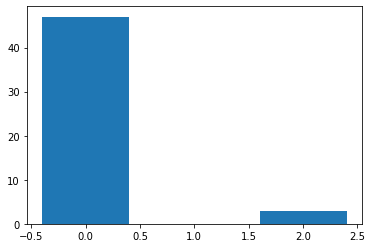

In [10]:
%matplotlib inline
plot_matches(corpus_full)

In [ ]:
# display_similar_article_and_categories(corpus_train, doc_id=425, by_article_tag=True)

In [15]:
corpus_text_full[425]

NameError: name 'corpus_text_full' is not defined

In [19]:
display_similar_article_and_categories(corpus_full, doc_id=425, by_article_tag=True)

the will study covid testing for arriving air passengers in move aimed at providing relief to an airline industry desperate to return to some semblance of normal traffic levels the government which ha
************
Get simlarity based on tokens:

0.7522265911102295 category:Business
0.73524409532547 category:prognosis
0.704124927520752 category:Politics
0.7011990547180176 category:Markets
0.6803415417671204 category:Pursuits
0.6754156351089478 category:Travel
0.6749265193939209 title: Virgin Galactic's Key Test For Space Tourism (Radio) 
0.6686665415763855 title: Balance of Power: Airline Industry Pandemic Impact (Podcast) 
0.6574105024337769 category:Hyperdrive
0.6508526802062988 title: Airline Capacity Approaching 2019 Levels (Radio) 
************
Get simlarity based on article tag:

1.0000001192092896 title:U.K. Mulls Traveler Tests in Bid to Restart Air Travel
0.48720401525497437 keyword:Kitty Donaldson
0.21545788645744324 keyword:Siddhartha Singh
0.21544134616851807 title:India Ext

In [ ]:
# Analyse (unseen) test set

In [ ]:
# corpus_test = gen_tagged_docs(corpus_test_raw)

In [ ]:
# %matplotlib inline
# plot_matches(corpus_test, take_sample=False)

In [ ]:
# display_similar_article_and_categories(corpus_test, doc_id=13317)

In [ ]:
# import pandas as pd
# df_test = pd.read_csv('./test.csv')

In [ ]:
# df_test.iloc[5914]

In [ ]:
# %matplotlib inline
# plot_matches(corpus_test, sample_size=1000)

In [ ]:
# %matplotlib inline
# plot_matches(corpus_test, sample_size=1000, topn_perc=0.01)